In [12]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
wines = datasets.load_wine()

In [13]:
print("Features: ", wines.feature_names)
print("Labels: ", wines.target_names)
wines.data.shape

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


(178, 13)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(wines.data.shape[1]):
  wines.data[:, i] = le.fit_transform(wines.data[:, i])

In [15]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(wines.data,
                        wines.target, test_size = 0.34, random_state =142)

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="gini")

In [17]:
clf.fit(data_train,target_train)
print(clf.score(data_train,target_train))
predicted = clf.predict(data_test)
print(predicted)
print(predicted.dtype)

1.0
[0 2 0 1 0 1 2 0 2 2 1 2 0 1 1 0 0 0 0 2 2 1 0 2 0 0 1 0 0 2 1 0 0 1 0 2 1
 2 2 1 1 2 2 0 1 0 0 2 0 1 2 1 1 0 2 2 0 1 2 1 1]
int64


In [18]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(target_test, predicted))
from sklearn.metrics import confusion_matrix
confusion_matrix(target_test, predicted)


Accuracy: 0.8688524590163934


array([[19,  0,  1],
       [ 4, 18,  2],
       [ 0,  1, 16]])

In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(target_test, predicted, average='macro')
recall = recall_score(target_test, predicted, average='macro')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

precision: 0.8718535469107551
recall: 0.8803921568627451


[Text(172.05, 195.696, 'X[12] <= 69.0\ngini = 0.657\nsamples = 117\nvalue = [39, 47, 31]\nclass = Class_1'),
 Text(83.7, 152.208, 'X[6] <= 32.5\ngini = 0.479\nsamples = 72\nvalue = [1, 45, 26]\nclass = Class_1'),
 Text(37.2, 108.72, 'X[9] <= 33.5\ngini = 0.147\nsamples = 25\nvalue = [0, 2, 23]\nclass = Class_2'),
 Text(18.6, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = Class_1'),
 Text(55.800000000000004, 65.232, 'gini = 0.0\nsamples = 23\nvalue = [0, 0, 23]\nclass = Class_2'),
 Text(130.20000000000002, 108.72, 'X[11] <= 32.0\ngini = 0.158\nsamples = 47\nvalue = [1, 43, 3]\nclass = Class_1'),
 Text(93.0, 65.232, 'X[6] <= 39.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Class_2'),
 Text(74.4, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Class_2'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Class_1'),
 Text(167.4, 65.232, 'X[0] <= 64.5\ngini = 0.045\nsamples = 43\nvalue = [1, 42, 0]\nclass = Class_1'),

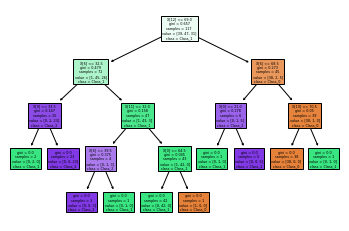

In [20]:
from sklearn import tree
tree.plot_tree(clf,filled=True,class_names=['Class_0','Class_1','Class_2'])

In [21]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='wines_tree.dot',feature_names=list(wines.feature_names),
                class_names=list(wines.target_names), filled=True)

from subprocess import call
call(['dot', '-Tpng', 'wines_tree.dot', '-o', 'wines_tree.png', '-Gdpi=600'])

0

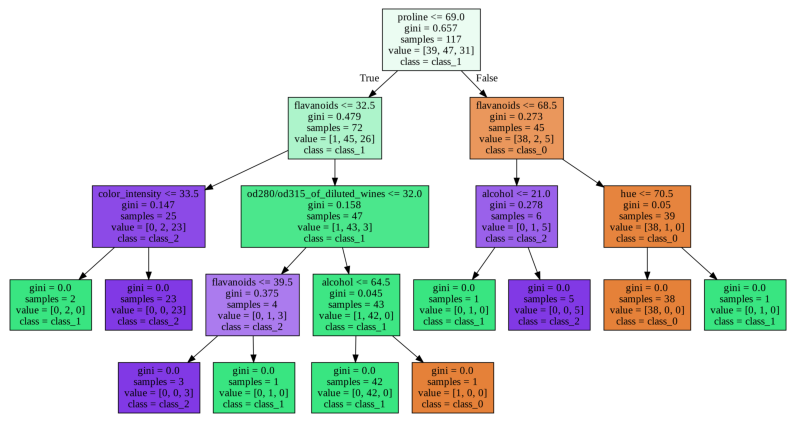

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('wines_tree.png'))
plt.axis('off')
plt.show()